## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2021.

# ECBM E4040 - Assignment 2- Task 5: Kaggle Open-ended Competition

Kaggle is a platform for predictive modelling and analytics competitions in which companies and researchers post data and statisticians and data miners compete to produce the best models for predicting and describing the data.

If you don't have a Kaggle account, feel free to join at [www.kaggle.com](https://www.kaggle.com). To let the CAs do the grading more conveniently, please __use Lionmail to join Kaggle__ and __use UNI as your username__.

The competition is located here: https://www.kaggle.com/c/ecbm4040-assignment-2-task-5/overview.

You can find detailed description about this in-class competition on the website above. Please read carefully and follow the instructions.

<span style="color:red">__TODO__:</span>
1. Train a custom model for the bottle dataset classification problem. You are free to use any methods taught in the class or found by yourself on the Internet (ALWAYS provide reference to the source).
General training methods include:
    * Dropout
    * Batch normalization
    * Early stopping
    * l1-norm & l2-norm penalization
    
2. You are given the test set to generate your predictions (70% public + 30% private, but you don't know which ones are public/private). Students should achieve an accuracy on the public test set of at least 70%. Two points will be deducted for each 1% below 70% accuracy threshold (i.e. 65% accuracy will have 10 points deducted). The accuracy will be shown on the public leaderboard once you submit your prediction .csv file. The private leaderboard will be released after the competition. The final ranking is based on the private leaderboard result, not the public leaderboard.
3. 

    * Report your results on the Kaggle, for comparison with other students' optimal results (you can do this several times). 
    * Save your best model, using Github Classroom, at the same time when you submit the homework files into Courseworks. See instructions below. 

__Hint__: You can start from what you implemented in task 4. Another classic classification model named 'VGG16' can also be easily implemented. Students are allowed to use pretrained networks, and utilize transfer learning. 

## HW Submission Details:
There are three components to reporting the results of this task: 

**(A) Submission (up to 20 submissions each day) of the .csv prediction file throught the Kaggle platform;**. You should start doing this __VERY early__, so that students can compare their work as they are making progress with model optimization.

**(B) Editing and submitting the content of this Jupyter notebook, through Courseworks; **
(i) The code for your CNN model and for the training function. The code should be stored in __./ecbm4040/neuralnets/kaggle.py__;
(ii) Print out your training process and accuracy __within this notebook__;

**(C) Submitting your best CNN model through Github Classroom repo.**

**Description of (C):** 
For this task, we will continue to use Github classroom to save your model for submission. 

<span style="color:red">__Submission content:__ :</span>
(i) In your Assignment 2 submission folder, create a subfolder called __KaggleModel__. Upload your best model with all the data output (for example, __MODEL.data-00000-of-00001, MODEL.meta, MODEL.index__) into the folder. 
(ii) Remember to delete any intermediate results, **we only want your best model. Do not upload any data files**. The instructors will rerun the uploaded best model and verify against the score which you reported on the Kaggle.



## Load Data

In [1]:
#Generate dataset
import os
import pandas as pd
import numpy as np
from PIL import Image


#Load Training images and labels
train_directory = "./data/kaggle_train_128/train_128" #TODO: Enter path for train128 folder (hint: use os.getcwd())
image_list=[]
label_list=[]
for sub_dir in os.listdir(train_directory):
    print("Reading folder {}".format(sub_dir))
    sub_dir_name=os.path.join(train_directory,sub_dir)
    for file in os.listdir(sub_dir_name):
        filename = os.fsdecode(file)
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_list.append(np.array(Image.open(os.path.join(sub_dir_name,file))))
            label_list.append(int(sub_dir))
X_train=np.array(image_list)
y_train=np.array(label_list)

#Load Test images
test_directory = "./data/kaggle_test_128/test_128"#TODO: Enter path for test128 folder (hint: use os.getcwd())
test_image_list=[]
test_df = pd.DataFrame([], columns=['Id', 'X'])
print("Reading Test Images")
for file in os.listdir(test_directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        test_df = test_df.append({
            'Id': filename,
            'X': np.array(Image.open(os.path.join(test_directory,file)))
        }, ignore_index=True)
        
test_df['s'] = [int(x.split('.')[0]) for x in test_df['Id']]
test_df = test_df.sort_values(by=['s'])
test_df = test_df.drop(columns=['s'])
X_test = np.stack(test_df['X'])


print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)

Reading folder 1
Reading folder 3
Reading folder 0
Reading folder 2
Reading folder 4
Reading Test Images
Training data shape:  (15000, 128, 128, 3)
Training labels shape:  (15000,)
Test data shape:  (3500, 128, 128, 3)


## Build and Train Your Model Here

In [2]:
# YOUR CODE HERE
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import datetime
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

%load_ext autoreload
%autoreload 2


gpu_devices = tf.config.experimental.list_physical_devices('GPU')
print(gpu_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
from sklearn.model_selection import train_test_split

x_split_train, x_val, y_split_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print('After split:')
print('Training data shape: ', x_split_train.shape)
print('Training labels shape: ', y_split_train.shape)
print('Validation data shape: ', x_val.shape)
print('Validation labels shape: ', y_val.shape)

After split:
Training data shape:  (13500, 128, 128, 3)
Training labels shape:  (13500,)
Validation data shape:  (1500, 128, 128, 3)
Validation labels shape:  (1500,)


In [9]:
from utils.neuralnets.kaggle_model import *

model = create_model2(lr = 1e-3)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [10]:

bs = 64 #batch size
epc = 25 #number of epoches
eraly_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=15, verbose=1, mode='auto')
# Reducing the Learning Rate if result is not improving. 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_delta=0.0004, patience=2, factor=0.1, min_lr=1e-6, mode='auto',
                              verbose=1)
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_generator = train_datagen.flow(x_split_train, y_split_train, batch_size=bs)
step_size_train=train_generator.n//train_generator.batch_size



In [11]:
history = model.fit_generator(generator = train_generator,
                    steps_per_epoch = step_size_train,
                    epochs = epc,
                    validation_data=(x_val, y_val),
                    callbacks=[reduce_lr, eraly_stop]
                   )
# history = model.fit(x=x_split_train, 
#           y=y_split_train,
#           batch_size=bs,
#           epochs=epc, 
#           validation_data=(x_val, y_val), 
#           callbacks=[reduce_lr, eraly_stop])

Epoch 1/25
210/210 [==============================] - 60s 253ms/step - loss: 0.8824 - accuracy: 0.6845 - val_loss: 0.2773 - val_accuracy: 0.9493
Epoch 2/25
210/210 [==============================] - 50s 240ms/step - loss: 0.1149 - accuracy: 0.9665 - val_loss: 0.1162 - val_accuracy: 0.9633
Epoch 3/25
210/210 [==============================] - 51s 242ms/step - loss: 0.0425 - accuracy: 0.9887 - val_loss: 0.1232 - val_accuracy: 0.9660
Epoch 4/25
210/210 [==============================] - 51s 245ms/step - loss: 0.0144 - accuracy: 0.9957 - val_loss: 0.1138 - val_accuracy: 0.9680
Epoch 5/25
210/210 [==============================] - 52s 246ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.1151 - val_accuracy: 0.9727
Epoch 6/25
210/210 [==============================] - 52s 246ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.1203 - val_accuracy: 0.9707

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/25
210/210 [============================

## Save your best model

In [12]:
# YOUR CODE HERE
model.save(filepath = "./model/kaggle/kaggle_model_resnet")


INFO:tensorflow:Assets written to: ./model/kaggle/kaggle_model_resnet/assets


## Generate .csv file for Kaggle

The following code snippet can be used to generate your prediction .csv file.

NOTE: If your kaggle results are indicating random performance, then it's likely that the indices of your csv predictions are misaligned.

In [2]:
import tensorflow as tf

loaded_model = tf.keras.models.load_model("./model/kaggle/kaggle_model_efficientnet")
probs = loaded_model.predict(X_test)
predictions = np.argmax(probs, axis=1)


In [3]:
import csv
with open('./data/predicted_efficientnet.csv','w') as csvfile:
    fieldnames = ['Id','label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index,l in enumerate(predictions):
        filename = str(index) + '.png'
        label = str(l)
        writer.writerow({'Id': filename, 'label': label})

In [6]:
probs = loaded_model.predict(X_train)
predictions = np.argmax(probs, axis=1)

a = []

for i in range(X_train.shape[0]):
    if predictions[i] != y_train[i]:
        a.append(X_train[i,:,:,:])
        

        

47


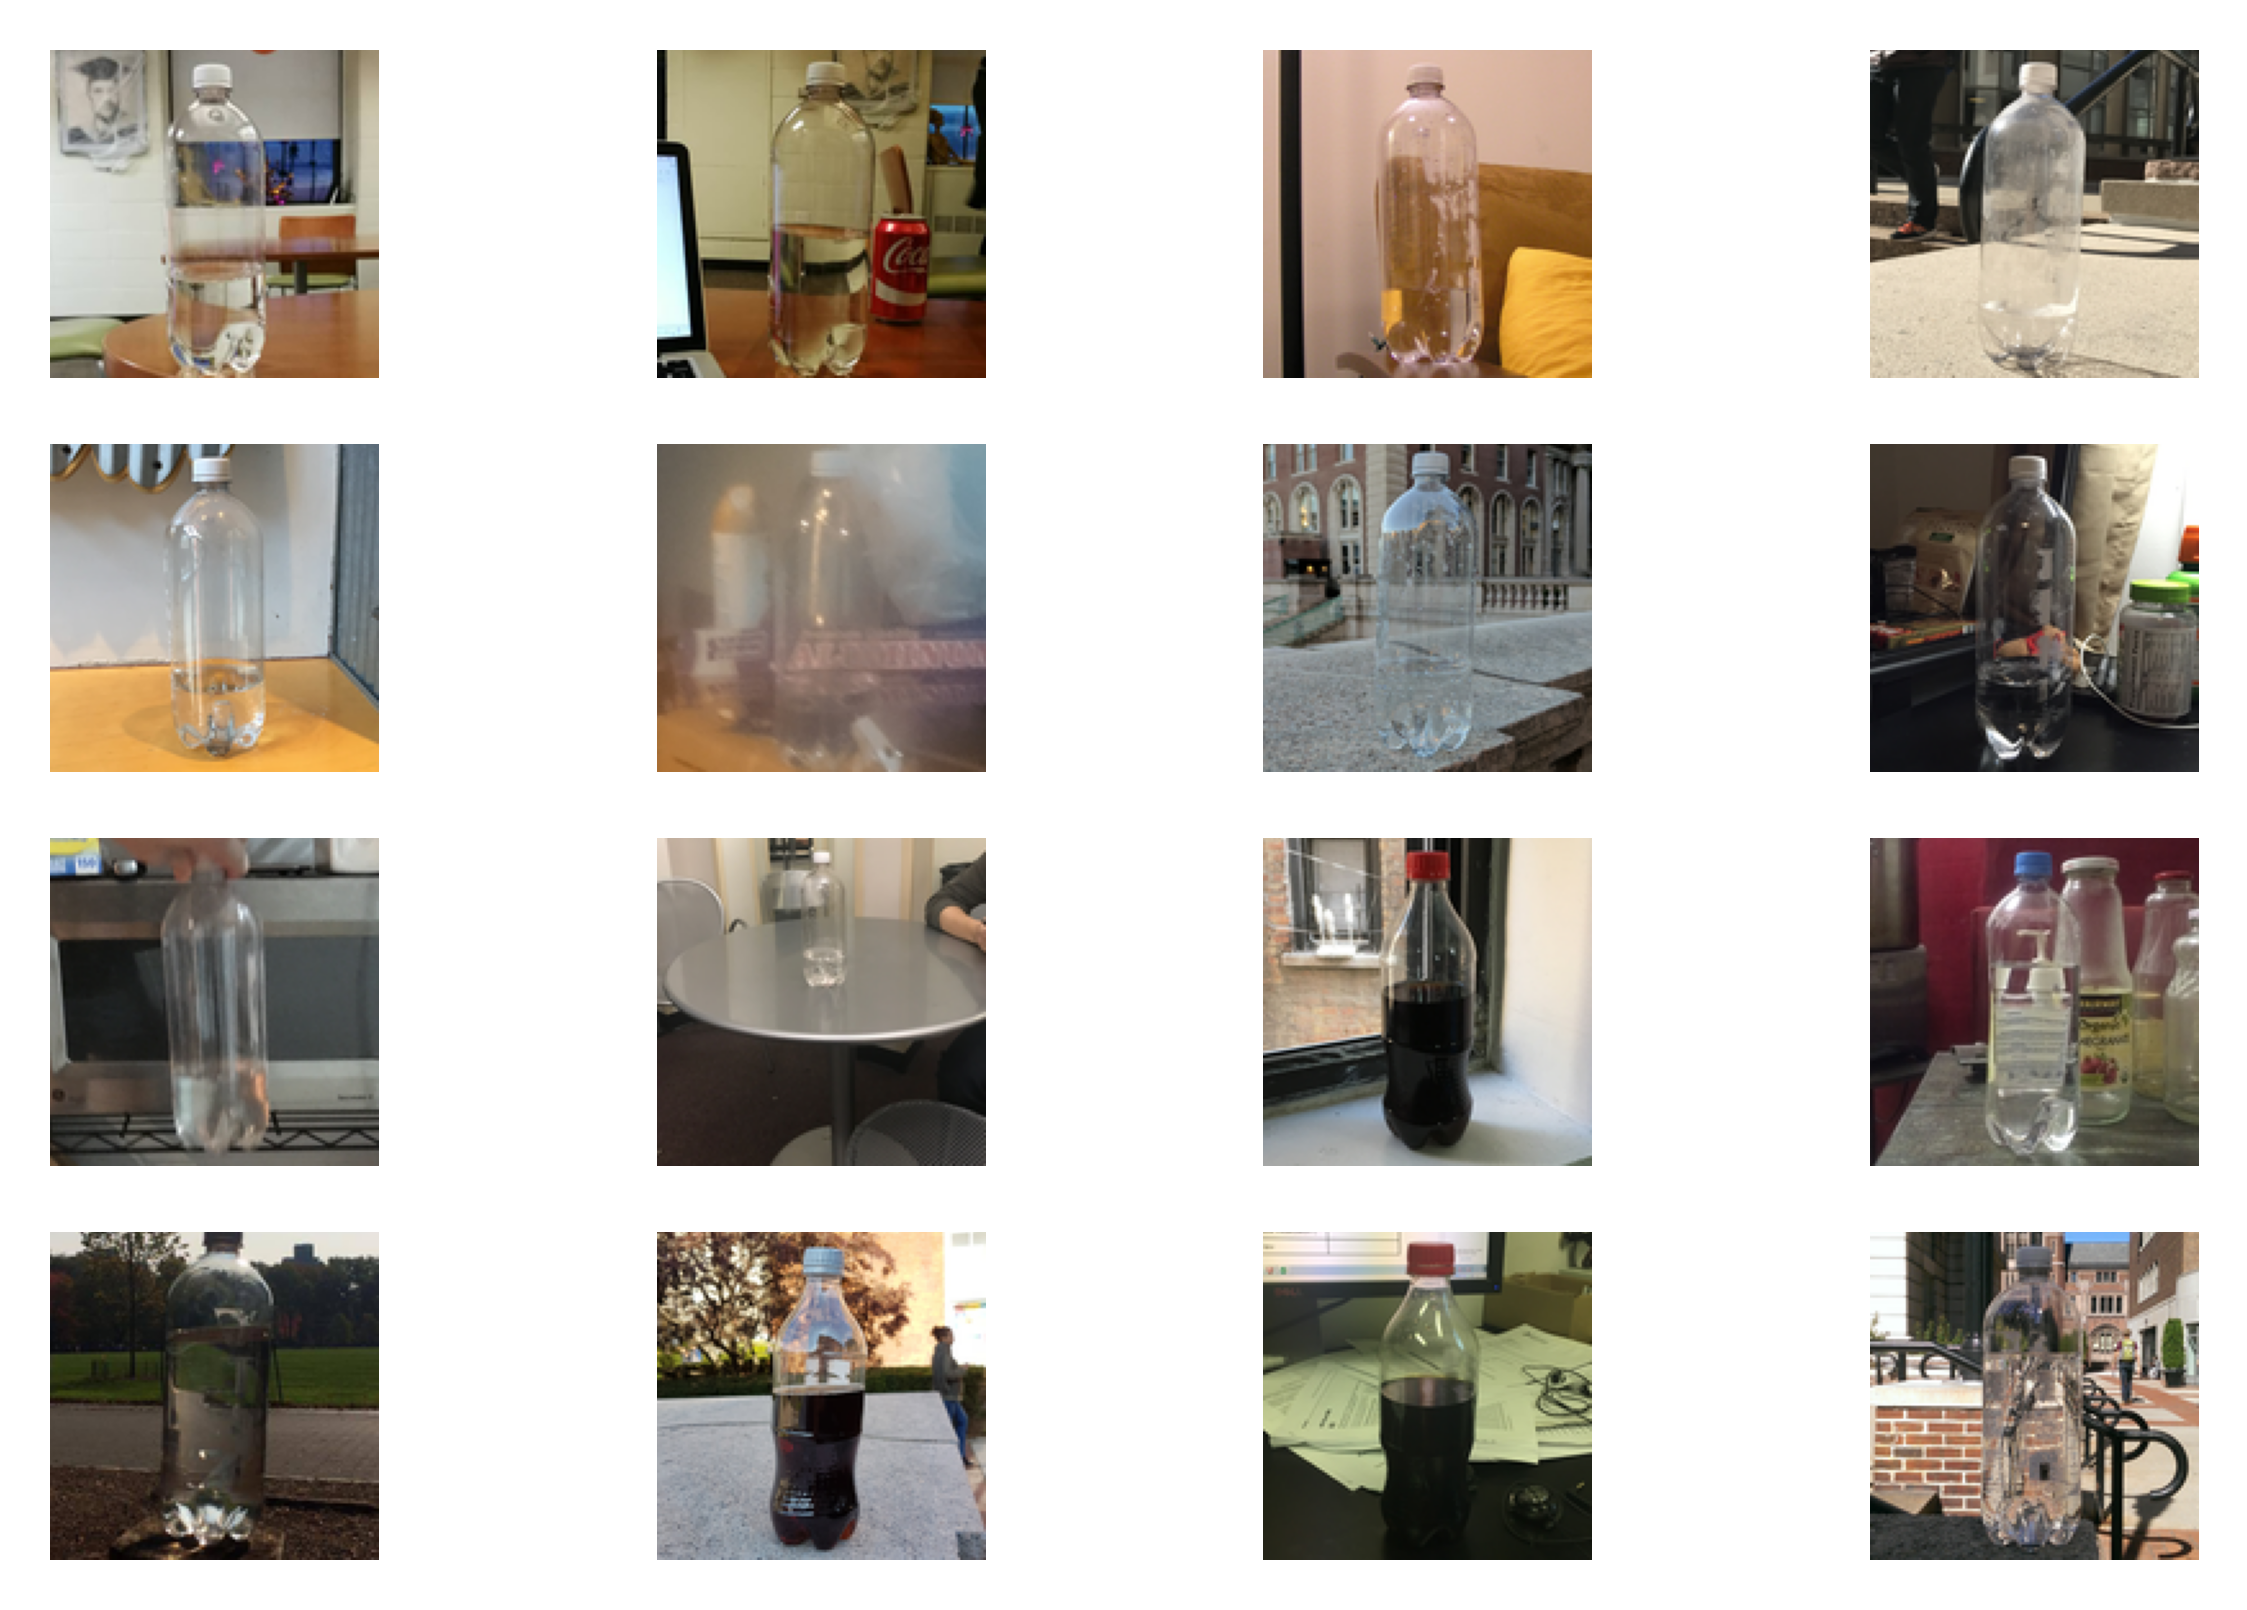

In [11]:
import matplotlib.pyplot as plt

print(len(a))

fig = plt.figure(dpi=500)
for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    ax.imshow(a[i])
    ax.axis('off')

    
